# Self Organizing Maps

In [2]:
!pip install SimpSOM

  Created wheel for SimpSOM: filename=SimpSOM-1.3.4-py3-none-any.whl size=17088 sha256=f36476efaa7607282847cb54a36b5d3e1aaf46520d4b0ee4907fe98a01ba79b0
  Stored in directory: /root/.cache/pip/wheels/22/93/66/28200809b28a3685b5040db97cbc27ddd8b1a6372101244102
Successfully built SimpSOM


In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import SimpSOM as sps

In [5]:
# Importing the dataset
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(15)
# dataset.iloc[:, 1:-1]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [11]:
# Training the SOM
# from minisom import MiniSom
# som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
# som.random_weights_init(X)
# som.train_random(data = X, num_iteration = 100)

# SimpSOM
som = sps.somNet(10, 10, X, PBC=True)
som.train(0.5, 10000)
som.save('credit_card_weight')

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


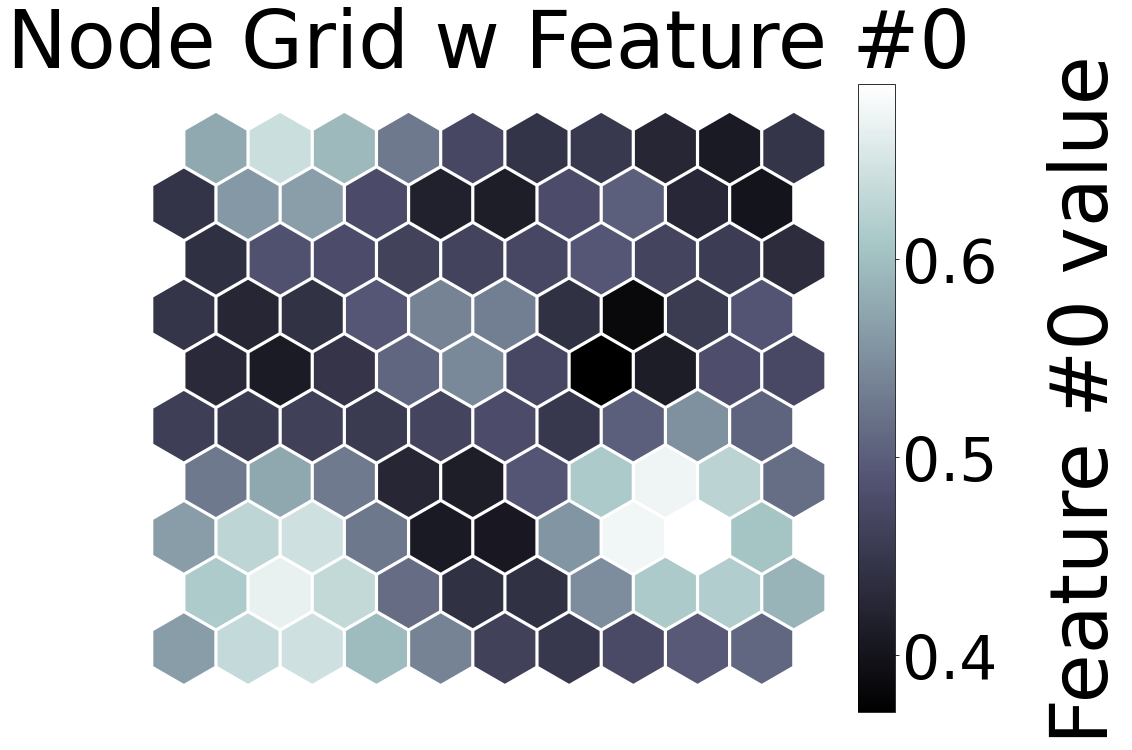

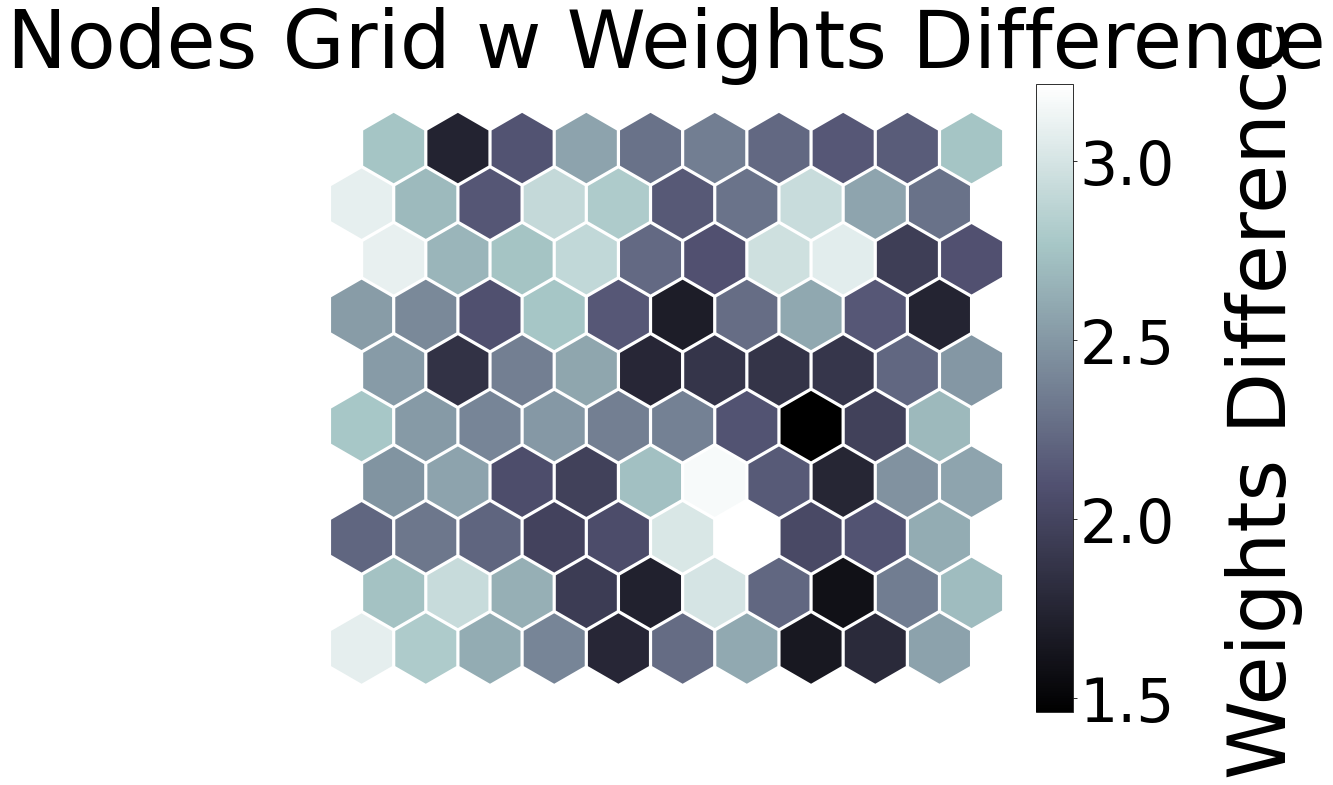

In [10]:
# Visualizing the results
# from pylab import bone, pcolor, colorbar, plot, show
# bone()
# som.
# pcolor(som.distance_map().T)
# colorbar()
# show()

# SimpSOM
som.nodes_graph(colnum=0)
som.diff_graph()

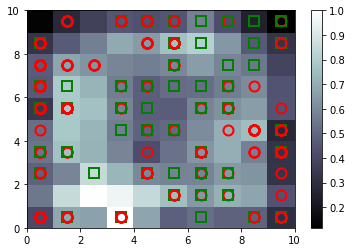

In [ ]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors  = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [ ]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(0,4)], mappings[(1,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)
for client in frauds:
    print(client[0])

15782089.0
15796569.0
15805212.0
15785339.0
15716276.0
15802071.0
15790630.0
15803682.0
15770406.0
15794868.0
15762392.0
15812470.0


---
# SimpSOM

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


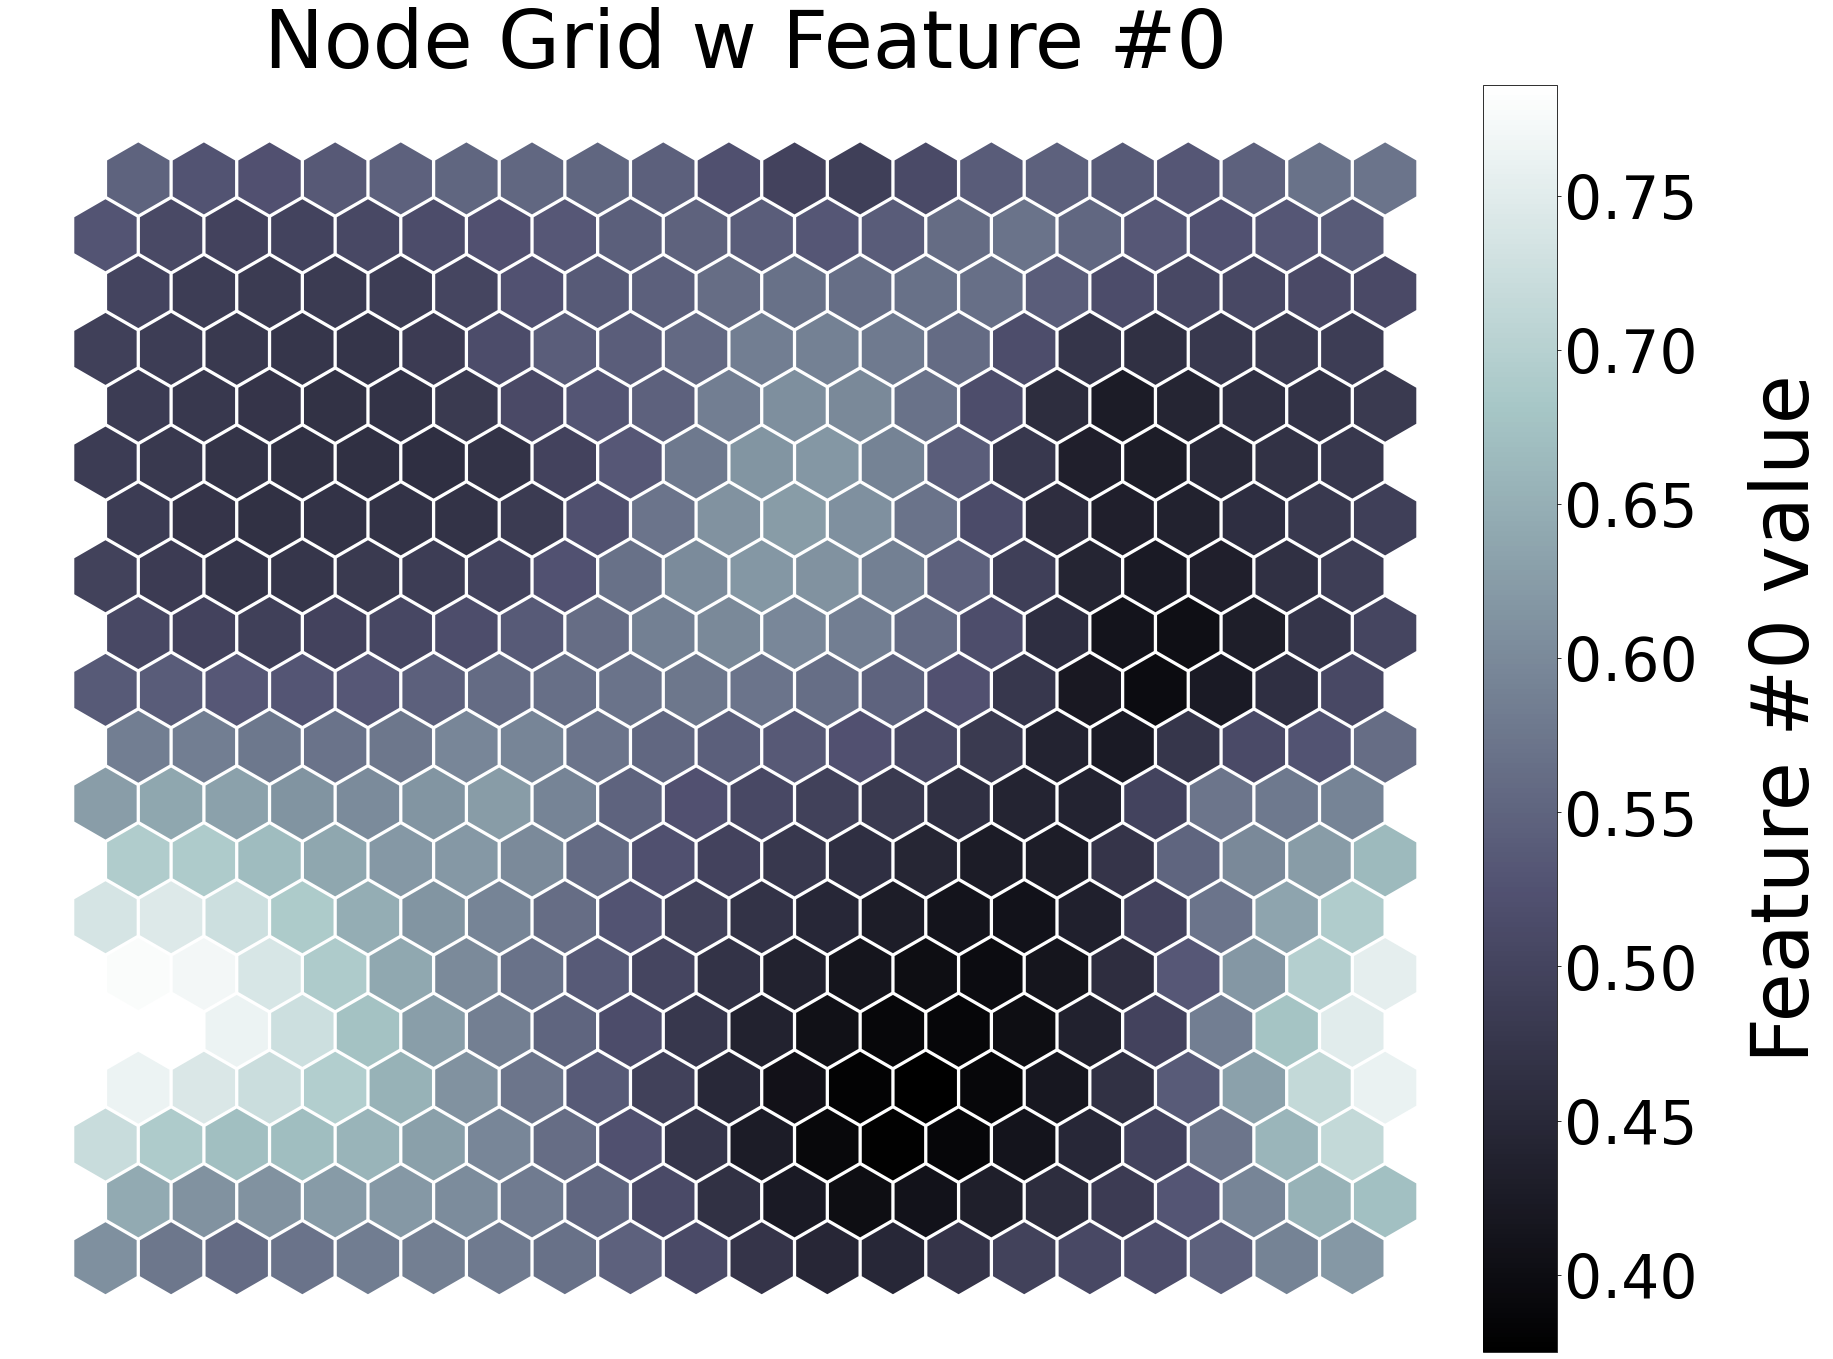

In [ ]:
# ! pip install SimpSOM
import pandas as pd
import SimpSOM as sps
from sklearn.cluster import KMeans
import numpy as np

net = sps.somNet(20, 20, X, PBC=True)
net.train(0.5, 100)
# net.save(‘filename_weights’)
net.nodes_graph(colnum=0)

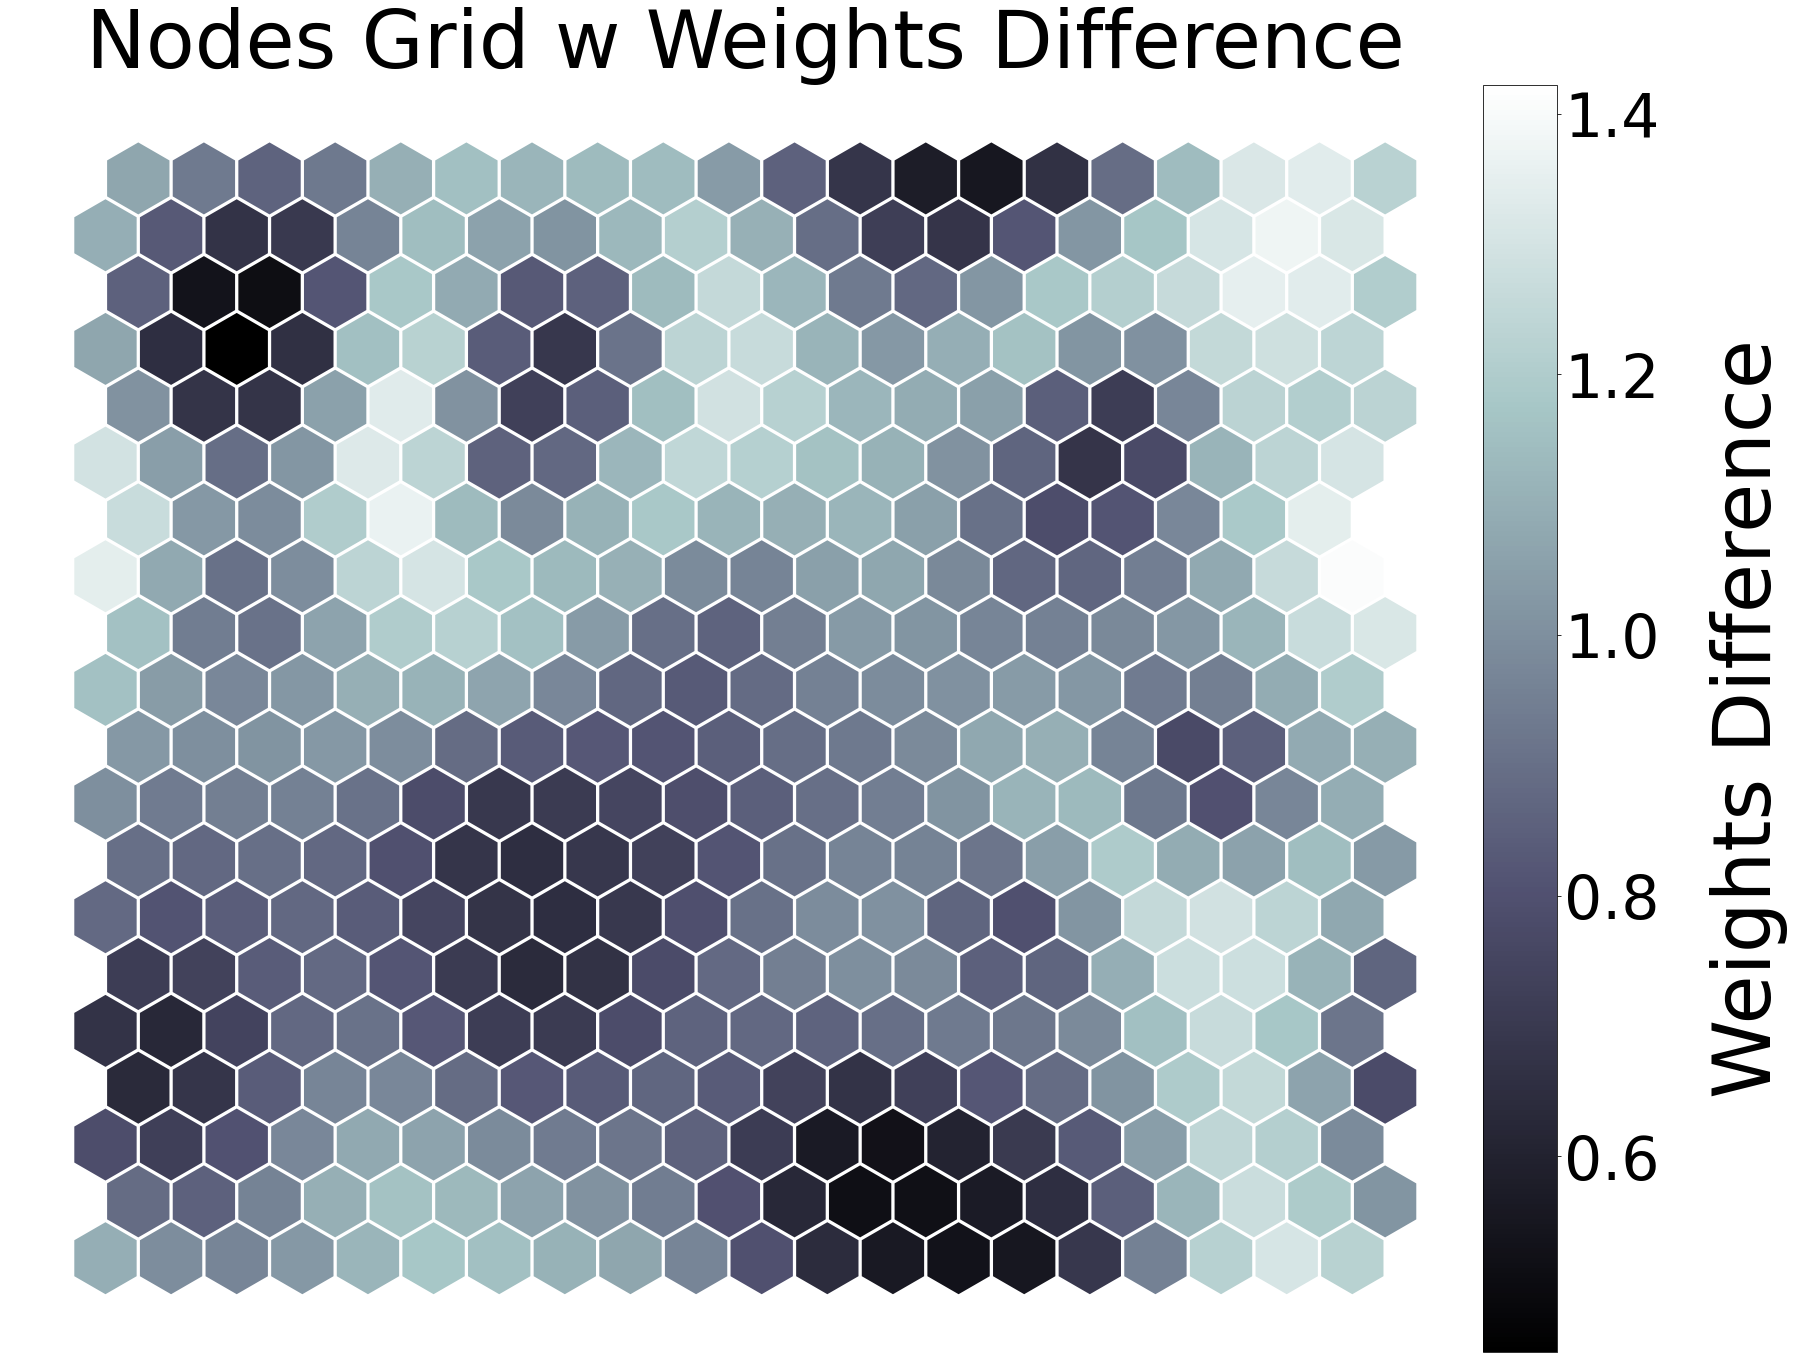

In [ ]:
net.diff_graph()

In [ ]:
#Project the datapoints on the new 2D network map.
net.project(X)

[[14, 15.588457268119896],
 [17, 6.9282032302755105],
 [14, 5.196152422706632],
 [6.5, 9.526279441628825],
 [2, 13.856406460551021],
 [2, 10.392304845413264],
 [15.5, 12.99038105676658],
 [2, 10.392304845413264],
 [14.5, 11.258330249197702],
 [5.5, 9.526279441628825],
 [6, 13.856406460551021],
 [5.5, 12.99038105676658],
 [7.5, 14.722431864335457],
 [7, 13.856406460551021],
 [14, 1.7320508075688776],
 [16, 12.124355652982143],
 [6, 12.124355652982143],
 [2, 10.392304845413264],
 [14, 12.124355652982143],
 [2, 10.392304845413264],
 [17, 6.9282032302755105],
 [6, 6.9282032302755105],
 [15.5, 12.99038105676658],
 [1, 3.4641016151377553],
 [16, 12.124355652982143],
 [6, 13.856406460551021],
 [14, 12.124355652982143],
 [6.5, 14.722431864335457],
 [2, 10.392304845413264],
 [6, 12.124355652982143],
 [6, 13.856406460551021],
 [14, 5.196152422706632],
 [8, 3.4641016151377553],
 [5.5, 12.99038105676658],
 [10, 12.124355652982143],
 [18.5, 12.99038105676658],
 [7, 3.4641016151377553],
 [6, 12.1243

<Figure size 432x288 with 0 Axes>

In [ ]:
#Cluster the datapoints according to the Quality Threshold algorithm.
net.cluster(X, type='qthresh')	

[[1,
  4,
  5,
  7,
  15,
  17,
  19,
  20,
  24,
  28,
  35,
  39,
  44,
  45,
  46,
  47,
  48,
  49,
  56,
  57,
  62,
  63,
  64,
  68,
  71,
  72,
  74,
  75,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  85,
  86,
  91,
  93,
  94,
  95,
  96,
  99,
  100,
  104,
  107,
  110,
  113,
  116,
  120,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  131,
  133,
  135,
  136,
  137,
  141,
  144,
  145,
  147,
  149,
  150,
  152,
  153,
  154,
  156,
  157,
  158,
  167,
  170,
  174,
  180,
  187,
  189,
  193,
  195,
  196,
  197,
  198,
  200,
  201,
  204,
  205,
  206,
  207,
  210,
  215,
  216,
  217,
  221,
  229,
  230,
  233,
  234,
  235,
  236,
  240,
  241,
  244,
  249,
  253,
  254,
  255,
  260,
  264,
  270,
  272,
  273,
  274,
  279,
  281,
  288,
  289,
  292,
  297,
  306,
  312,
  313,
  318,
  319,
  330,
  336,
  337,
  338,
  343,
  347,
  350,
  357,
  359,
  361,
  363,
  366,
  367,
  368,
  369,
  370,
  371,
  375,
  378,
  379,
  382,
  385,
  387,
  38

<Figure size 432x288 with 0 Axes>